# Keras Deep Learning in Python - Credit Card Fraud Detection


### Developing a Deep Neural Network in Keras to Predict and Classify Credit Card Transactions into Fraud or Non-Fraud

1. Import the pandas package into this Jupyter notebook and refer it as pd


2. Import the numpy package into this Jupyter notebook and refer it as np

In [1]:
import pandas as pd

import numpy as np

**pandas** is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python.


**NumPy** is the fundamental package for scientific computing with Python.

In [2]:
# Read and load credit card fraud data into Pandas dataframe and name it as df

df = pd.read_csv('C:/data/creditcard_historical_data.csv')

## Exploratory Data Analysis

In [3]:
df

,TXNid,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,TXNA0000001,29.0,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,6.54,0
1,TXNA0000002,32.0,1.249055,-0.624727,-0.710589,-0.991600,1.429973,3.692977,-1.090209,0.967291,...,-0.006293,0.009200,-0.129463,1.112970,0.500382,1.196549,-0.048220,0.005094,29.89,0
2,TXNA0000003,32.0,-2.008872,2.198527,0.144242,1.159432,-0.815174,0.182288,-0.617108,1.530817,...,0.094917,0.294983,0.011081,0.015249,0.034211,-0.236141,0.128291,0.117986,2.35,0
3,TXNA0000004,33.0,-0.607877,1.031345,1.740450,1.232106,0.418592,0.119168,0.850893,-0.176267,...,-0.087329,0.258315,-0.264775,0.118282,0.173508,-0.217041,0.094312,-0.033041,14.80,0
4,TXNA0000005,33.0,-0.935732,0.170416,2.746261,-1.077965,-0.305594,0.011577,-0.296178,0.402776,...,0.401212,1.064864,-0.158325,0.295505,-0.259370,0.754195,0.046664,0.093948,9.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284332,TXNA0284333,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284333,TXNA0284334,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284334,TXNA0284335,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284335,TXNA0284336,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284337.0,94797.597397,47472.343458,29.000000,54208.000000,84666.000000,139293.000000,172792.000000
V1,284337.0,-0.000134,1.958362,-56.407510,-0.920439,0.018109,1.315499,2.454930
V2,284337.0,-0.000195,1.651311,-72.715728,-0.598655,0.065416,0.803687,22.057729
V3,284337.0,0.000499,1.514942,-48.325589,-0.889801,0.179993,1.027518,9.382558
V4,284337.0,-0.000128,1.415447,-5.600607,-0.848668,-0.019838,0.743303,16.875344
V5,284337.0,-0.000112,1.380077,-113.743307,-0.691700,-0.054592,0.611678,34.801666
V6,284337.0,0.000077,1.332412,-26.160506,-0.768212,-0.274148,0.398659,73.301626
V7,284337.0,0.000035,1.235462,-43.557242,-0.554147,0.040032,0.570272,120.589494
V8,284337.0,0.000097,1.192689,-73.216718,-0.208555,0.022368,0.327404,20.007208
V9,284337.0,0.000320,1.098555,-13.434066,-0.642983,-0.051224,0.597469,15.594995


### Understanding the Label which we want to predict

In [5]:
# The Labels Contain 2 Classes = Binary Classification

df['Class'].unique()

array([0, 1], dtype=int64)

### How many of these transactions are fraudulent where the Class is 1?

In [6]:
class_count = df['Class'].value_counts()

print('Number of Transactions:', class_count[1] + class_count[0])
print('Non-Fraud:', class_count[0])
print('Fraud:', class_count[1])
print('Fraud Percentage:', round(class_count[1] / (class_count[1] + class_count[0])*100,2),'%')

Number of Transactions: 284337
Non-Fraud: 283850
Fraud: 487
Fraud Percentage: 0.17 %


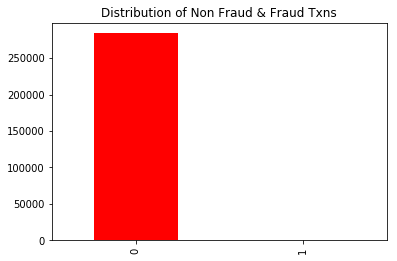

In [8]:
class_count.plot(color=['r'], 
kind='bar', title='Distribution of Non Fraud & Fraud Txns')

### Machine Learning on Fraud Detection is a type of Anomaly Detection as the labels are highly imbalanced because fraudulent transactions are minor representation among all credit card transactions




### In most dataset, Amount is commonly found as not normally distributed.

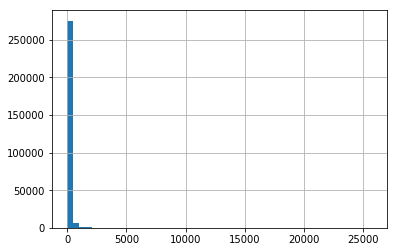

In [9]:
df['Amount'].hist(bins=50)

## Data Preprocessing

Apply a power transform featurewise to make data more Gaussian-like = Normally Distributed

In [10]:
# Import the PowerTransformer function from the scikit package into this Jupyter notebook

from sklearn.preprocessing import PowerTransformer


# Instantiate PowerTransformer

pt = PowerTransformer()

In [11]:
# Train the transform on the data

pt.fit(df[['Amount']])

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [12]:
# Apply the power transform to the data

df['Log Amount'] = pt.transform(df[['Amount']])

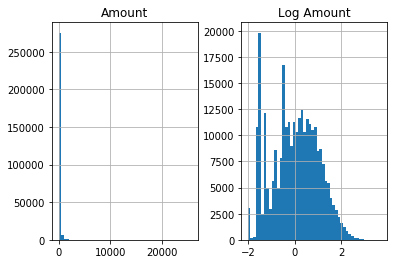

In [13]:
# Plot to compare before and after the transformation

import matplotlib.pyplot as plt

df[['Amount', 'Log Amount']].hist(bins=50)
plt.show()

In [14]:
# Remove the Amount Column as we now have the normally distributed Log Amount column
df = df.drop(['Amount'], axis = 1)

df = df.drop(['Time'], axis = 1)


# Set TXNid as the index of the dataframe
df = df.set_index('TXNid')

In [15]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Amount
TXNid,,,,,,,,,,,,,,,,,,,,,
TXNA0000001,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,0.044865,...,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,0,-0.665973
TXNA0000002,1.249055,-0.624727,-0.710589,-0.991600,1.429973,3.692977,-1.090209,0.967291,0.850149,-0.307081,...,-0.006293,0.009200,-0.129463,1.112970,0.500382,1.196549,-0.048220,0.005094,0,0.204460
TXNA0000003,-2.008872,2.198527,0.144242,1.159432,-0.815174,0.182288,-0.617108,1.530817,-0.586832,0.129876,...,0.094917,0.294983,0.011081,0.015249,0.034211,-0.236141,0.128291,0.117986,0,-1.192230
TXNA0000004,-0.607877,1.031345,1.740450,1.232106,0.418592,0.119168,0.850893,-0.176267,-0.243501,0.148455,...,-0.087329,0.258315,-0.264775,0.118282,0.173508,-0.217041,0.094312,-0.033041,0,-0.202489
TXNA0000005,-0.935732,0.170416,2.746261,-1.077965,-0.305594,0.011577,-0.296178,0.402776,-0.040472,-0.852046,...,0.401212,1.064864,-0.158325,0.295505,-0.259370,0.754195,0.046664,0.093948,0,-0.480996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXNA0284333,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-1.619742
TXNA0284334,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.096129
TXNA0284335,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.675434



1. iloc is used for data selection operation.


2. The colon (:) before the comma refers to the rows, and with the colon, we are taking all rows in the dataset.


3. Here, we have selected all rows of all columns except the 'Class' column from the df dataset into X dataset. Now, X contains our features = inputs we need to train a model.


4. Again with the y, we included all the rows under the 'Class' column into y. y contains our labels = outputs we want to infer.

In [16]:
X = df.iloc[: , df.columns != 'Class']
y = df.iloc[: , df.columns == 'Class']

In [17]:
X    # X contains all the features

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log Amount
TXNid,,,,,,,,,,,,,,,,,,,,,
TXNA0000001,1.110880,0.168717,0.517144,1.325407,-0.191573,0.019504,-0.031849,0.117620,0.017665,0.044865,...,-0.190120,-0.037709,0.095701,-0.048198,0.232115,0.606201,-0.342097,0.036770,0.007480,-0.665973
TXNA0000002,1.249055,-0.624727,-0.710589,-0.991600,1.429973,3.692977,-1.090209,0.967291,0.850149,-0.307081,...,0.097853,-0.006293,0.009200,-0.129463,1.112970,0.500382,1.196549,-0.048220,0.005094,0.204460
TXNA0000003,-2.008872,2.198527,0.144242,1.159432,-0.815174,0.182288,-0.617108,1.530817,-0.586832,0.129876,...,0.028740,0.094917,0.294983,0.011081,0.015249,0.034211,-0.236141,0.128291,0.117986,-1.192230
TXNA0000004,-0.607877,1.031345,1.740450,1.232106,0.418592,0.119168,0.850893,-0.176267,-0.243501,0.148455,...,0.254325,-0.087329,0.258315,-0.264775,0.118282,0.173508,-0.217041,0.094312,-0.033041,-0.202489
TXNA0000005,-0.935732,0.170416,2.746261,-1.077965,-0.305594,0.011577,-0.296178,0.402776,-0.040472,-0.852046,...,-0.005419,0.401212,1.064864,-0.158325,0.295505,-0.259370,0.754195,0.046664,0.093948,-0.480996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXNA0284333,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-1.619742
TXNA0284334,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.096129
TXNA0284335,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.675434


In [18]:
y    # y contains all the labels

,Class
TXNid,
TXNA0000001,0
TXNA0000002,0
TXNA0000003,0
TXNA0000004,0
TXNA0000005,0
...,...
TXNA0284333,0
TXNA0284334,0
TXNA0284335,0


Now, we import the train_test_split function from the scikit package into this Jupyter notebook.

What it does:
1. Split our dataset into a training set and a test set.

2. Telling scikit-learn that size of the training set will be 80%

3. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time.


In [19]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=8606)

## Specifying the Architecture of a Deep Neural Network in Keras

In [20]:
import keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.
C:\Users\chunpin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chunpin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chunpin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\chunpin\App

**Deep neural networks** contain multiple non-linear hidden layers and this makes them the expressive models that can learn very complicated relationships between their inputs and outputs


In a neural network, numeric data points, called inputs, are fed into the neurons in the input layer. Each neuron has a weight, and multiplying the input number with the weight gives the output of the neuron, which is transferred to the next layer.


**1. Keras** = A high-level neural networks API written in Python. The Keras API is the official frontend of TensorFlow.

**2. Sequential** = A linear stack of layers which we can use it to build a Multilayer Perceptron.

**3. Dense** = Implement to build the densely-connected neural network layer.

**4. Dropout** = A regularization layer for reducing overfitting by randomly drop units from neural network during model training. Dropout usually improve generalization performance on all data sets compared to neural networks that did not use dropout.


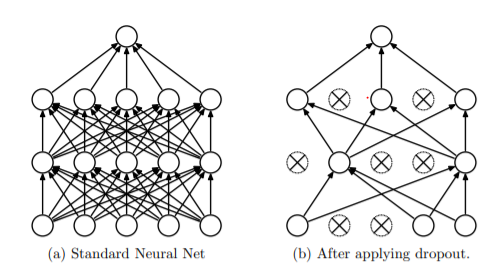

**5. Activation** = Activation functions are mathematical equations attached to each neuron in the network that determine the output of a neural network.

•	An activation functions allows the model to capture nonlinearities in the training dataset.

•	It applies to the value coming into a node, then transform it into the value stored in that node as the node output

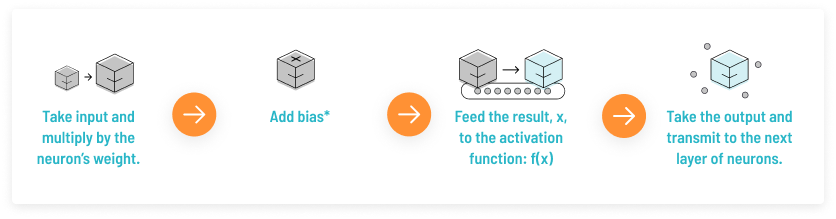

In [21]:
# Let's create a Deep Neural Network with Sequential
model1 = Sequential()

model1.add(Dense(16, input_dim =29, activation='relu'))
model1.add(Dense(24, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(20, activation='relu'))
model1.add(Dense(24, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

**1st Layer** = 16 Neurons, 29 Input Features, relu is the activation

**2nd Layer** = 24 Neurons, relu is the activation

**3rd Layer** = Dropout at 0.5 = probability of 0.5 for retaining the output of each node in this hidden layer

**4th Layer** = 20 Neurons, relu is the activation

**5th Layer** = 24 Neurons, relu is the activation

**6th Layer** = 1 Neurons, sigmoid is the activation


**Rectified Linear Activation Function** or ReLU in short, is commonly used as activation function by both the industries and researchers.

1. When an input into a node is negative, output = 0, so the slope is 0
2. When an input into a node is positive, output = the input value, so the slope is 1 


**Sigmoid** is a logistic regression function with the output values bond between 0 and 1, hence it is the right function here for the output layer which we want to produce binary classification

## Configuring the model by calling the function model.compile and then fit the model

**Optimizer** = Optimizers are algorithms or methods used to change the attributes of a neural network such as weights and learning rate in order to reduce the losses or errors.

**Loss** = Also known as error function, is used to measure how accurate our algorithm is doing. The loss function for outputs producing 0 or 1 is called binary crossentropy.

**Metrics** = Accuracy is used when we want to track accuracy on top of the loss function.

**Batch Size** = Number of training examples per batch.

**Epoch** = The full training dataset forward propogates and then backpropogates for one cycle.

*Example: We have 2000 rows of training set, when set batch size = 200, then after 10 iterations, it completed 1 epoch*

In [22]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# X_train is the first argument because this is our features for training, 
# and y_train is the second argument as it is our label for training

model1.fit(X_train, y_train , batch_size = 200, epochs = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
227469/227469 [==============================] - 2s 10us/step - loss: 0.0355 - accuracy: 0.9902
Epoch 2/10
227469/227469 [==============================] - 2s 7us/step - loss: 0.0055 - accuracy: 0.9983
Epoch 3/10
227469/227469 [==============================] - 2s 7us/step - loss: 0.0040 - accuracy: 0.9991
Epoch 4/10
227469/227469 [==============================] - 2s 7us/step - loss: 0.0035 - accuracy: 0.9991
Epoch 5/10
227469/227469 [==============================] - 2s 7us/step - loss: 0.0034 - accuracy: 0.9992
Epoch 6/10
227469/227469 [==============================] - 2s 7us/step - loss: 0.0030 - accuracy: 0.9994
Epoch 7/10
227469/227469 [==============================] - 2s 7us/step - loss: 0.0029 - accuracy: 0.9994
Epoch 8/10
227469/227469 [==============================] - 2s 7us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 9/10
227469/227469 [==============================

**Image Credit** to *machinelearningknowledge.ai* for a great animation of the forward propogation and backpropagation of neural network

In [33]:
from IPython.display import HTML
HTML('<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif">')

### Evaluate Model's Error and Accuracy

In [23]:
loss_and_accuracy = model1.evaluate(X_test, y_test)

print(loss_and_accuracy)

56868/56868 [==============================] - 1s 14us/step
[0.0039004114842793995, 0.9992086887359619]


### Next, we will use the model trained with X_train dataset, to predict the class (a.k.a. label or y) of the X_test dataset. 

### And, we name it as y_hat.

In [24]:
y_hat = model1.predict(X_test)

In [25]:
y_hat

array([[5.1081181e-05],
       [5.0663948e-07],
       [2.7835369e-05],
       ...,
       [9.8529250e-05],
       [1.1495957e-05],
       [8.6878004e-05]], dtype=float32)

In [26]:
# we convert the y_test to pandas' dataframe

y_hat = pd.DataFrame(y_hat)

In [27]:
y_hat.round()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
56863,0.0
56864,0.0
56865,0.0
56866,0.0


### y_test = Actual Labels
### y_hat = Predicted labels

In [28]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat.round())

**TN** **FP**

**FN** **TP**

In [29]:
print(cnf_matrix)

[[56743    23]
 [   22    80]]


**FP** = Actual is 0 or Non-Fraud **BUT** Predicted as 1 or Fraud

**FN** = Actual is 1 or Fraud **BUT** Predicted as 0 or Non-Fraud

## Plot a Confusion Matrix with the matplotlib Package

In [30]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
#from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

Confusion matrix
[[56743    23]
 [   22    80]]


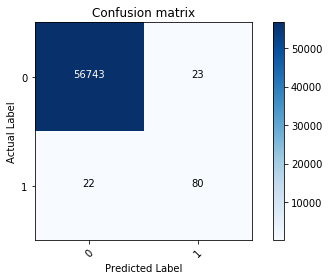

In [31]:
y_hat = model1.predict(X_test)
y_actual = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_actual, y_hat.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

### False Negative needs to be further minimized to produce a reliable and accurate model for operation

## Model Optimization: An Important Next Step to Enhance Classification Accuracy by Addressing Imbalance in Labels

**SMOTE** or **Synthetic Minority Over-Sampling Technique** = An oversampling algorithm utilizes the principal of nearest neighbors to create its synthetic data. Therefore, synthetic data generated is similar to the existing one.

The purpose of over-sampling the minority label here is to balance out the labels distribution to prevent heavy bias of the model by avoiding feeding in dataset that is heavily bias at the first place.

In [35]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

In [36]:
y_ar = np.array(y)
print("Before OverSampling, counts of label '1': {}".format(sum(y_ar==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_ar==0)))

y_resample_ar = np.array(y_resample)
print("After OverSampling, counts of label '1': {}".format(sum(y_resample_ar==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resample_ar==0)))


Before OverSampling, counts of label '1': [487]
Before OverSampling, counts of label '0': [283850]
After OverSampling, counts of label '1': 283850
After OverSampling, counts of label '0': 283850


In [37]:
from sklearn.model_selection import train_test_split

X_ostrain, X_ostest, y_ostrain, y_ostest = train_test_split(X_resample, y_resample, train_size=0.8, random_state=8606)

In [38]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model1.fit(X_ostrain, y_ostrain , batch_size = 150, epochs = 10)

Epoch 1/10
454160/454160 [==============================] - 4s 10us/step - loss: 0.0370 - accuracy: 0.9876
Epoch 2/10
454160/454160 [==============================] - 4s 9us/step - loss: 0.0104 - accuracy: 0.9973
Epoch 3/10
454160/454160 [==============================] - 4s 9us/step - loss: 0.0080 - accuracy: 0.9980
Epoch 4/10
454160/454160 [==============================] - 4s 9us/step - loss: 0.0068 - accuracy: 0.9984
Epoch 5/10
454160/454160 [==============================] - 4s 9us/step - loss: 0.0062 - accuracy: 0.9986
Epoch 6/10
454160/454160 [==============================] - 4s 9us/step - loss: 0.0054 - accuracy: 0.9988
Epoch 7/10
454160/454160 [==============================] - 4s 9us/step - loss: 0.0052 - accuracy: 0.9989
Epoch 8/10
454160/454160 [==============================] - 4s 9us/step - loss: 0.0049 - accuracy: 0.9990
Epoch 9/10
454160/454160 [==============================] - 4s 10us/step - loss: 0.0048 - accuracy: 0.9990
Epoch 10/10
454160/454160 [=================

In [39]:
HTML('<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif">')

Confusion matrix
[[56614   123]
 [    0 56803]]


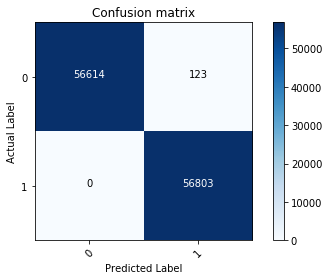

In [40]:
y_hat = model1.predict(X_ostest)
y_actual = pd.DataFrame(y_ostest)
cnf_matrix = confusion_matrix(y_actual, y_hat.round())
plot_confusion_matrix(cnf_matrix, classes=[0 ,1])
plt.show()

**TN** **FP**

**FN** **TP**

**FP** = Actual is 0 or Non-Fraud **BUT** Predicted as 1 or Fraud

**FN** = Actual is 1 or Fraud **BUT** Predicted as 0 or Non-Fraud

For a ML use case in fraud detection, lowering false negative is important because the Fraud or Compliance Team would like to prevent actual fraudulent transaction from being predicted or flagged as non-fraudulent.


Through Over-Sampling, we have effectively enhanced the accuracy of the model and lowered the number of false negative. After optimization, the model is less likely to let a fraudulent transaction flows pass it without flagging it out correctly.

In [42]:
# Since this model is performing better after optimization, let's save it for future use.

model.save('creditcard_fraud_MLmodel.h5')

## Lets' Use Our Trained and Saved Model to Predict on the Future Unseen Data by Our Model = "Next Day" Credit Card Txn Data

In [43]:
nextday = pd.read_csv('C:/data/creditcard_nextday_data.csv')

In [44]:
from keras.models import load_model

creditcard_fraud_MLmodel = load_model('creditcard_fraud_MLmodel.h5')

### Data Preprocessing

In [45]:
nextday

,TXNid,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,TXNB0000001,85285,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,...,0.545698,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00
1,TXNB0000002,68207,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00
2,TXNB0000003,94362,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,...,2.812241,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.00
3,TXNB0000004,148053,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,...,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1.59
4,TXNB0000005,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,TXNB0000496,68071,-0.267213,1.009205,1.718694,1.228670,0.311115,0.276414,0.784522,-0.300109,...,0.415479,-0.075780,0.699042,-0.149920,0.129349,-0.511750,-0.310460,0.289243,-0.129766,0.01
496,TXNB0000497,68071,0.805575,-0.455369,0.484172,1.582539,-0.518802,0.089108,0.069667,0.022271,...,0.174479,0.054837,0.046158,-0.228589,0.115146,0.568956,-0.288434,0.023970,0.050857,183.53
497,TXNB0000498,68071,-1.195739,0.222015,2.431456,0.120116,0.798431,1.001468,1.216941,-0.314560,...,-0.140902,-0.091803,0.437858,-0.452955,-0.280455,0.429851,-0.444794,-0.619290,-0.591947,87.91
498,TXNB0000499,68072,-1.238503,1.473031,0.714599,4.250126,0.964714,0.369489,0.924734,-0.549203,...,0.004087,0.088658,0.842358,0.288620,0.201295,-1.294032,0.072253,-0.662857,0.157678,3.78


In [46]:
pt.fit(nextday[['Amount']])

PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

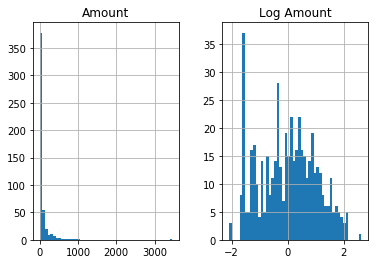

In [47]:
nextday['Log Amount'] = pt.transform(nextday[['Amount']])

nextday[['Amount', 'Log Amount']].hist(bins=50)
plt.show()

In [48]:
nextday = nextday.drop(['Amount'], axis = 1)
nextday = nextday.drop(['Time'], axis = 1)
nextday = nextday.set_index('TXNid')

## Use the Saved Model to Predict on New Next Day Credit Card Transactions

In [49]:
y_hat = creditcard_fraud_MLmodel.predict(nextday)

In [50]:
y_hat = pd.DataFrame(y_hat)

## Merge back the Predicted Outputs to Inputs for a Completed Txn Table to the Fraud Team

In [51]:
Fraud = y_hat.round()

nextday = pd.concat([nextday.reset_index(drop=False), Fraud.reset_index(drop=True)], axis=1)

In [52]:
nextday = nextday.rename(columns={0: 'Fraud'})

In [53]:
nextday

,TXNid,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Log Amount,Fraud
0,TXNB0000001,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,-2.095766,1.0
1,TXNB0000002,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,-1.545798,1.0
2,TXNB0000003,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,...,-8.755698,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,-1.545798,1.0
3,TXNB0000004,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-1.349366,1.0
4,TXNB0000005,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,-1.545798,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,TXNB0000496,-0.267213,1.009205,1.718694,1.228670,0.311115,0.276414,0.784522,-0.300109,0.394467,...,-0.075780,0.699042,-0.149920,0.129349,-0.511750,-0.310460,0.289243,-0.129766,-2.087625,0.0
496,TXNB0000497,0.805575,-0.455369,0.484172,1.582539,-0.518802,0.089108,0.069667,0.022271,0.499768,...,0.054837,0.046158,-0.228589,0.115146,0.568956,-0.288434,0.023970,0.050857,1.308142,0.0
497,TXNB0000498,-1.195739,0.222015,2.431456,0.120116,0.798431,1.001468,1.216941,-0.314560,0.253638,...,-0.091803,0.437858,-0.452955,-0.280455,0.429851,-0.444794,-0.619290,-0.591947,0.922919,0.0
498,TXNB0000499,-1.238503,1.473031,0.714599,4.250126,0.964714,0.369489,0.924734,-0.549203,-1.264781,...,0.088658,0.842358,0.288620,0.201295,-1.294032,0.072253,-0.662857,0.157678,-0.901702,0.0


## Export to CSV for Fraud Team's Consumption

In [61]:
export_csv = nextday.to_csv (r'C:\Fraud_Team\Fraud_2020/02/02.csv', index = None, header=True)

## Visualize on Tableau for Fraudulent Transactions Management

In [55]:
HTML('<img src="https://github.com/cplim-84/Neural-Network/blob/master/Fraud%20Management%20with%20Tableau.PNG?raw=true">')

## Thank You.

For any questions, feel free to drop me an email cp.lim@outlook.com